In [698]:
import matplotlib as mpl
import matplotlib.pyplot as plt

# change the following to %matplotlib notebook for interactive plotting
%matplotlib inline

# Optionally, tweak styles.
mpl.rc('figure',  figsize=(10, 6))
mpl.rc('image', cmap='gray')
import cv2


from scipy.fftpack import fft
from timeit import default_timer as timer
from math import sqrt
import pandas as pd
import trackpy as tp
from matplotlib import cm
pixel=7
micron=33.7
mpp=micron/pixel
mpp

from pandas import DataFrame, Series  # for convenience

import pims
import numpy as np

In [888]:
pixel=7
micron=33.7
mpp=micron/pixel
mpp
fps=250
cut=2
hz=0.5
#fps=24
#cut=2
#hz=0.5

period=int(fps/cut*(1/hz))
period

250

In [700]:
import pathlib
pathlib.Path().absolute()

PosixPath('/Users/yongdou/Dropbox/track')

In [701]:
import glob
glob.glob('/Users/yongdou/Downloads/track/*' )

['/Users/yongdou/Downloads/track/n9f02_2CUT',
 '/Users/yongdou/Downloads/track/cma_5f01_2cut',
 '/Users/yongdou/Downloads/track/02062020_06F2',
 '/Users/yongdou/Downloads/track/02082020',
 '/Users/yongdou/Downloads/track/9f01_2cut',
 '/Users/yongdou/Downloads/track/n6f02_2cut',
 '/Users/yongdou/Downloads/track/02032020',
 '/Users/yongdou/Downloads/track/8f01_2cut',
 '/Users/yongdou/Downloads/track/4f02_2cut',
 '/Users/yongdou/Downloads/track/cma_4f03',
 '/Users/yongdou/Downloads/track/9f07_2cut',
 '/Users/yongdou/Downloads/track/old data']

In [850]:
name=glob.glob('/Users/yongdou/Downloads/track/02082020/numerical702/*.csv' )
name

['/Users/yongdou/Downloads/track/02082020/numerical702/0d0.2hz250fps.csv',
 '/Users/yongdou/Downloads/track/02082020/numerical702/0d0.5hz250fps.csv',
 '/Users/yongdou/Downloads/track/02082020/numerical702/0d1hz500fps.csv']

In [714]:
video=glob.glob('/Volumes/Seagate Backup Plus Drive/02052020/cma_5f01/*.avi')
video

['/Volumes/Seagate Backup Plus Drive/02052020/cma_5f01/0d.avi',
 '/Volumes/Seagate Backup Plus Drive/02052020/cma_5f01/20d.avi',
 '/Volumes/Seagate Backup Plus Drive/02052020/cma_5f01/minus20d.avi']

In [887]:
#frames=pims.Video('20d02.avi')

d0=pd.read_csv(name[1])
name[1]

'/Users/yongdou/Downloads/track/02082020/numerical702/0d0.5hz250fps.csv'

'/Volumes/Seagate Backup Plus Drive/02052020/cma_5f01/20d.avi'

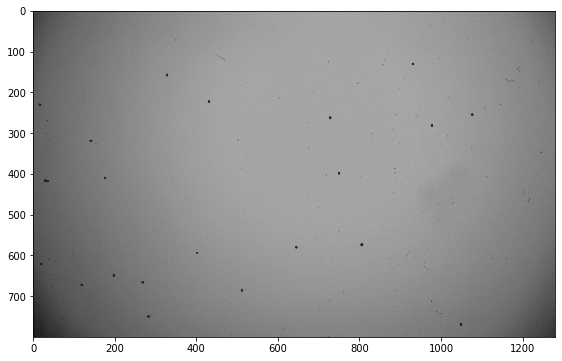

In [852]:

frames=pims.Video(video[1])
plt.imshow(frames[1])
video[1]

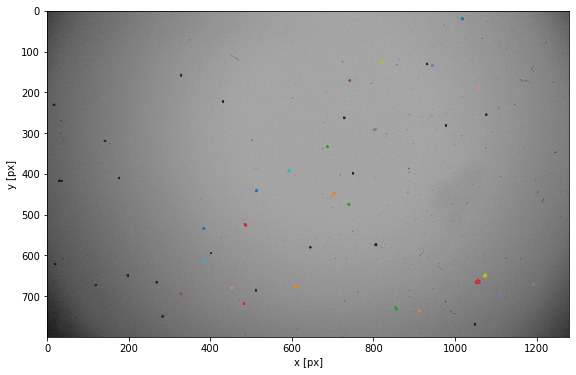

In [853]:
plt.figure()
tp.plot_traj(d0,superimpose=frames[0]);

In [854]:
l,w,_=frames[0].shape
l=int(l*mpp)
w=int(w*mpp)

In [855]:
w

6162

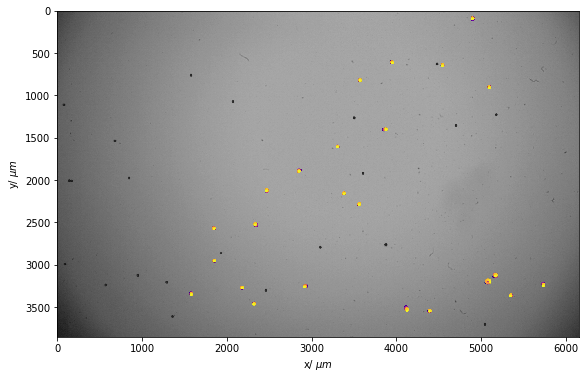

In [856]:
fig, ax = plt.subplots()
plt.imshow(frames[0], extent=[0, w, 0, l],origin='lower')

for i in list(set(d0["particle"])):
    d0i=d0[d0["particle"]==i]
    head=d0i['frame'].values[0]
    tail=d0i['frame'].values[-1]
    color=(d0i['frame'].values-head)/(tail-head)
    plt.scatter(d0i['x']*mpp,d0i['y']*mpp,linewidth=1,c=cm.plasma(color),s=0.2)
    #plt.plot(d0i['x'],d0i['y'],linewidth=1)
plt.xlim(0,w)
plt.ylim(0,l)

plt.xlabel(r'x/ $\mu m$')
plt.ylabel(r'y/ $\mu m$')
plt.gca().invert_yaxis()
ax.set_aspect('equal')




#  Navigation Velocity

In [889]:
ID=list(set(d0["particle"]))
d0['time']=d0['frame']/(fps/cut)

Text(0.5, 1.0, 'Averge\n3.0$\\mu$m/period, 0.15radius/period')

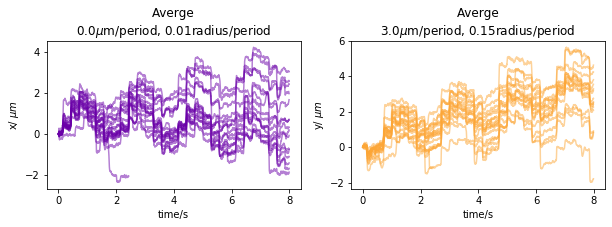

In [738]:

vx=np.zeros(len(ID))
vy=np.zeros(len(ID))
ax1 = plt.subplot(221)
ax2 = plt.subplot(222)
for i in range(len(ID)):
    dID=d0[d0['particle']==ID[i]]
    distancex=(pd.DataFrame.diff(dID['x']).dropna()).sum()*mpp
    distancey=(pd.DataFrame.diff(dID['y']).dropna()).sum()*mpp
    ## same as above
    ##(dID['x'].iloc[-1]-dID['x'].iloc[0])*mpp
    vx[i]=distancex/((dID['time'].iloc[-1]-dID['time'].iloc[0])/(1/hz))
    vy[i]=distancey/((dID['time'].iloc[-1]-dID['time'].iloc[0])/(1/hz))
    ax1.plot(dID['time']-dID['time'].iloc[0],dID['x']-dID['x'].iloc[0],c=cm.plasma(0.2),alpha=0.5)


    ax2.plot(dID['time']-dID['time'].iloc[0],dID['y']-dID['y'].iloc[0],c=cm.plasma(0.8),alpha=0.5)

ax1.set_ylabel(r'x/ $\mu m$')
ax1.set_xlabel('time/s')
ax1.set_title("Averge\n"+str(np.round(np.mean(vx)))+r"$\mu$m/period, "+str(np.round(np.mean(vx)*2/micron,decimals=2))+"radius/period")
ax2.set_ylabel(r'y/ $\mu m$')
ax2.set_xlabel('time/s')
ax2.set_title("Averge\n"+str(np.round(np.mean(vy)))+r"$\mu$m/period, "+str(np.round(np.mean(vy)*2/micron,decimals=2))+"radius/period")
    

# time series

In [890]:
np.round(2.2444)

2.0

In [929]:

partilcenumber=ID[10]
particle1=d0[d0["particle"]==partilcenumber]

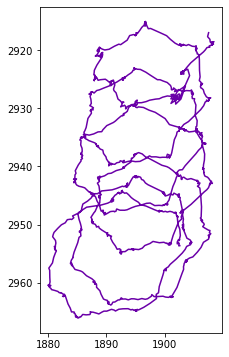

In [930]:
fig, ax = plt.subplots()
plt.plot(particle1['x']*mpp,particle1['y']*mpp,c=cm.plasma(0.2))
plt.gca().invert_yaxis()
ax.set_aspect('equal')

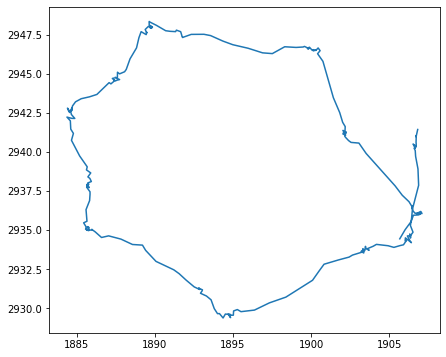

In [931]:
n=2

fig, ax = plt.subplots()
plt.plot(particle1['x'][period*n:period*(n+1)]*mpp,particle1['y'][period*n:period*(n+1)]*mpp)
ax.set_aspect('equal')

In [932]:
particle1.head()

,frame,y,x,mass,size,ecc,signal,raw_mass,ep,frame.1,particle,time
10,0,605.908491,396.230621,2952.036346,2.536736,0.031978,94.001801,-37463.0,0.744427,0,11,0.000
34,1,606.050682,396.194387,2911.275527,2.520231,0.034524,93.851865,-37512.0,0.146944,1,11,0.008
53,2,606.145994,396.277244,2880.786045,2.519444,0.037110,94.641208,-37540.0,0.311429,2,11,0.016
81,3,606.242168,396.288590,2877.541802,2.526856,0.040303,94.345633,-37548.0,0.309445,3,11,0.024
106,4,606.250203,396.359596,2875.174058,2.541724,0.041226,93.140101,-37543.0,0.196249,4,11,0.032


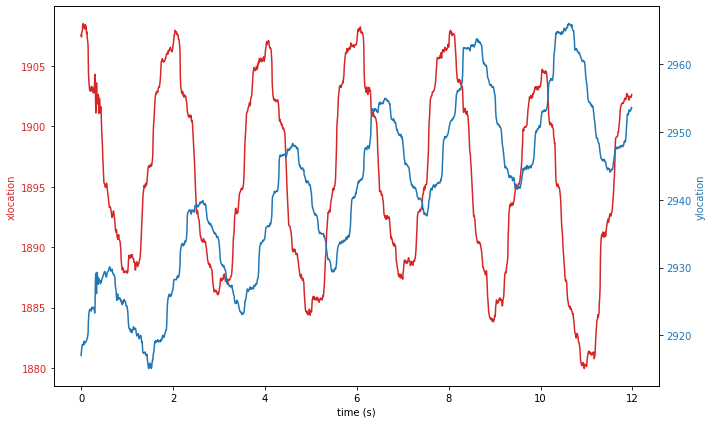

In [933]:
# Create some mock data


fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xlabel('time (s)')
ax1.set_ylabel('xlocation', color=color)
ax1.plot(particle1['time'].values,particle1['x'].values*mpp, color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('ylocation', color=color)  # we already handled the x-label with ax1
ax2.plot(particle1['time'].values,particle1['y'].values*mpp, color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()

In [934]:
from statsmodels.tsa.seasonal import seasonal_decompose


In [935]:


dates = np.arange(len(particle1['x'].values*mpp))
datay = particle1['y'].values*mpp
datax = particle1['x'].values*mpp
dfy = pd.DataFrame({'data': datay}, index=dates)
dfx = pd.DataFrame({'data': datax}, index=dates)

# Reproduce the example in OP
resultx=seasonal_decompose(dfx, model='additive', freq=period)
resulty=seasonal_decompose(dfy, model='additive', freq=period)
####
observex=resultx.observed
seasonx=resultx.seasonal
trendx=resultx.trend
resx=resultx.resid
#####
observey=resulty.observed
seasony=resulty.seasonal
trendy=resulty.trend
resy=resulty.resid


Text(0, 0.5, 'Residual')

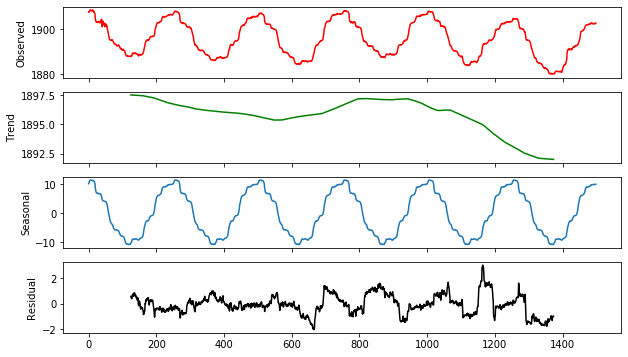

In [936]:
fig, axes = plt.subplots(4, 1, sharex=True)

resultx.observed.plot(ax=axes[0], legend=False, color='r')
axes[0].set_ylabel('Observed')
resultx.trend.plot(ax=axes[1], legend=False, color='g')
axes[1].set_ylabel('Trend')
resultx.seasonal.plot(ax=axes[2], legend=False)
axes[2].set_ylabel('Seasonal')
resultx.resid.plot(ax=axes[3], legend=False, color='k')
axes[3].set_ylabel('Residual')

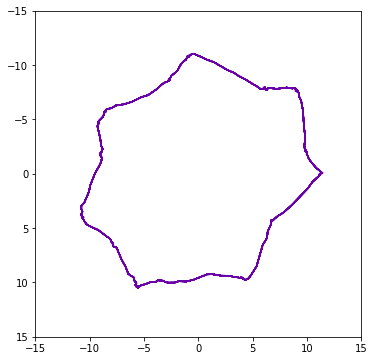

In [937]:
fig, ax = plt.subplots()

plt.plot(seasonx.values,seasony.values,c=cm.plasma(0.2))
#plt.plot(seasonx.values,seasony.values,linewidth=1,alpha=1)
plt.ylim(-15,15)
plt.xlim(-15,15)
plt.gca().invert_yaxis()

ax.set_aspect('equal')

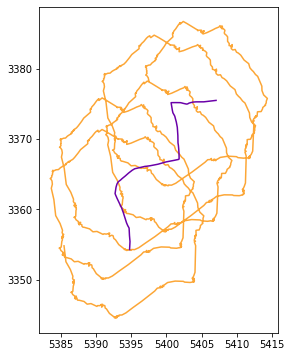

In [918]:
fig, ax = plt.subplots()
plt.plot(trendx.values+seasonx.values,trendy.values+seasony.values,c=cm.plasma(0.8))
plt.plot(trendx.values,trendy.values,c=cm.plasma(0.2))
#plt.plot(seasonx.values,seasony.values,linewidth=1,alpha=1)
ax.set_aspect('equal')


# the drift velocity

In [133]:
velocity = DataFrame({'dx':trendx['data'].values, 'dy': trendy['data'].values,'time':particle1['time'].values})
velocity=velocity.dropna()

In [134]:
velocity.head()

,dx,dy,time
12,2478.125644,3291.292182,1.000000
13,2479.193126,3291.068690,1.083333
14,2480.268485,3290.845666,1.166667
15,2481.344677,3290.623972,1.250000
16,2482.382702,3290.495770,1.333333


In [135]:
diff=pd.DataFrame.diff(velocity).dropna()
dx,dy=diff.sum()[['dx','dy']]

In [136]:
cycles=(velocity['time'].iloc[-1]-velocity['time'].iloc[0])/(1/hz)

In [137]:
velocity_x=dx/cycles/33.7
velocity_y=dy/cycles/33.7

In [138]:
diff['dvx']=diff['dx']/diff['time']
diff['dvy']=diff['dy']/diff['time']

10.106401644956014 4.285191354250549


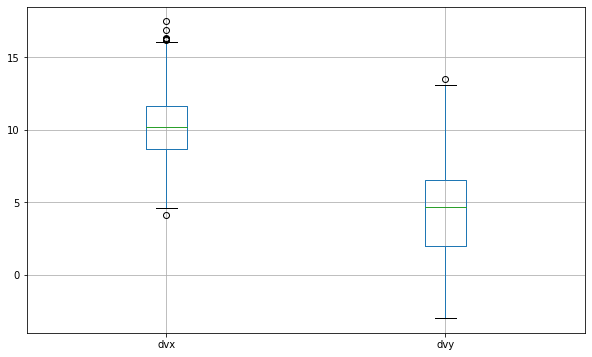

In [139]:
boxplot = diff.boxplot(column=['dvx', 'dvy'])
print(np.mean(diff['dvx']),np.mean(diff['dvy']))

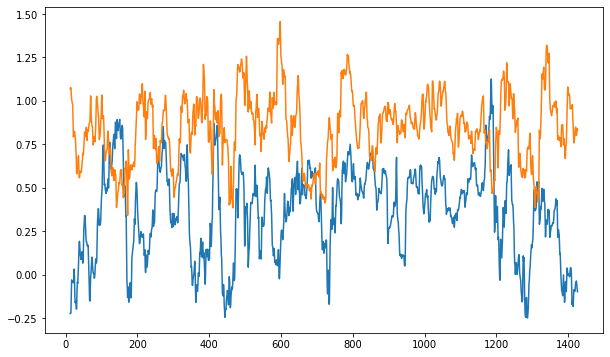

In [140]:
plt.plot(diff['dy'])
plt.plot(diff['dx'])